In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Download the Higgs dataset from OpenML
higgs = fetch_openml(name="Higgs", version=1, as_frame=True)
X = higgs.data
y = higgs.target

# Display basic information about the dataset
print("Dataset Shape:", X.shape)
print("Target Classes:", y.unique())
X.head()

Dataset Shape: (98050, 28)
Target Classes: [1 0]


,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,jet2pt,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


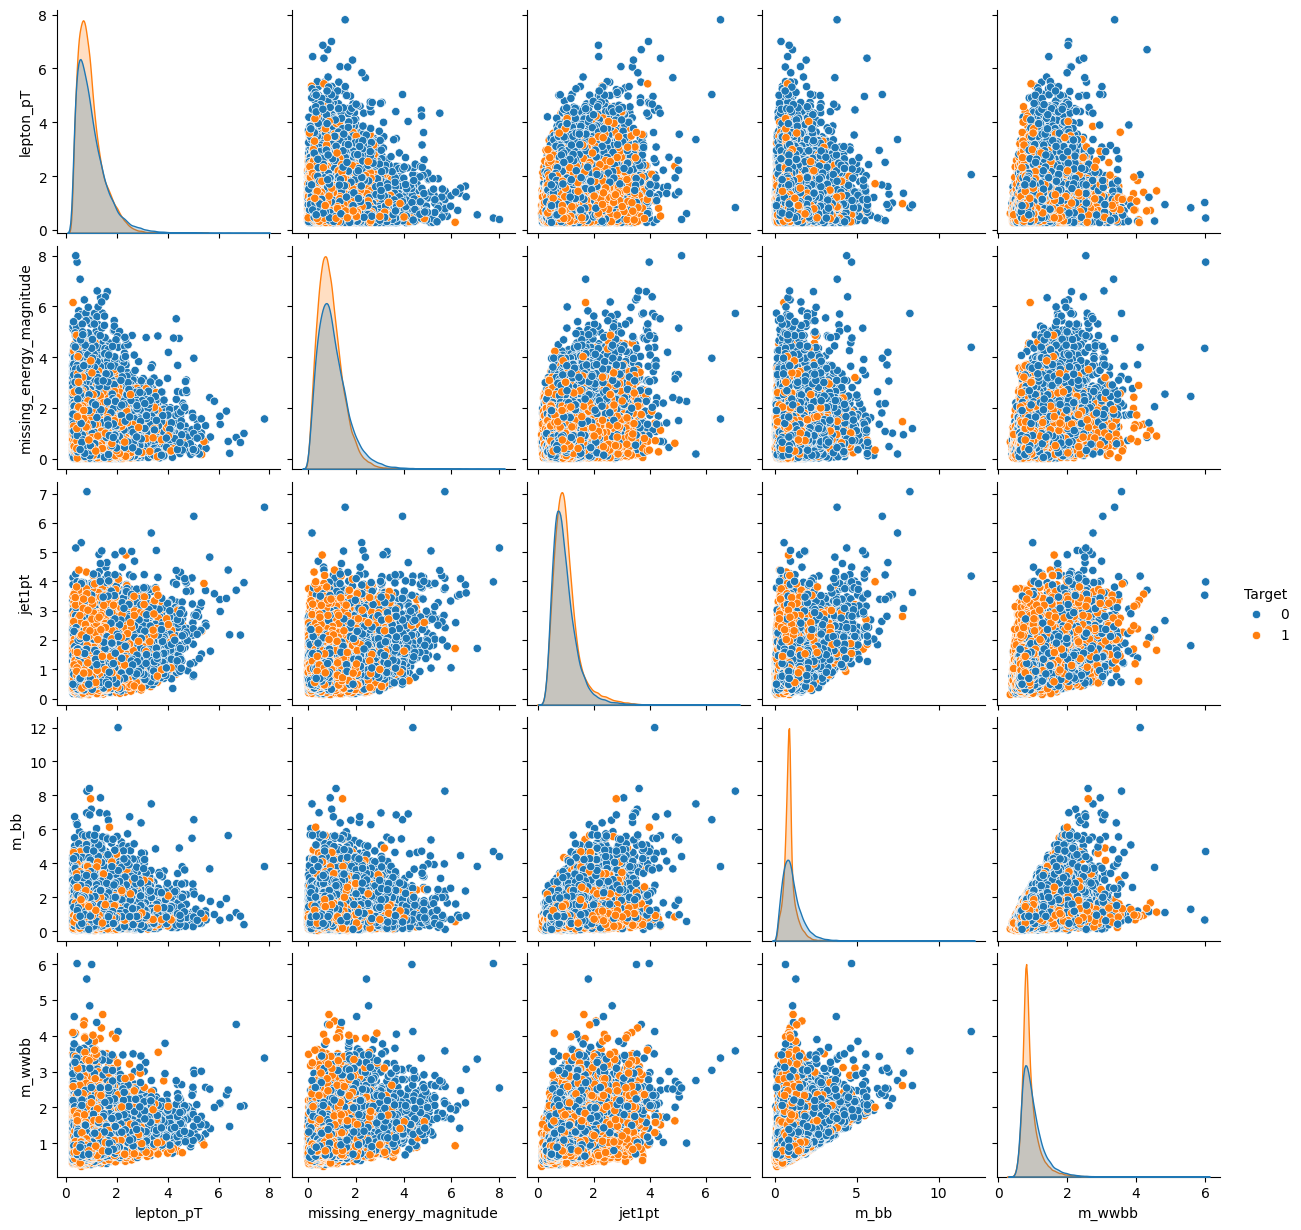

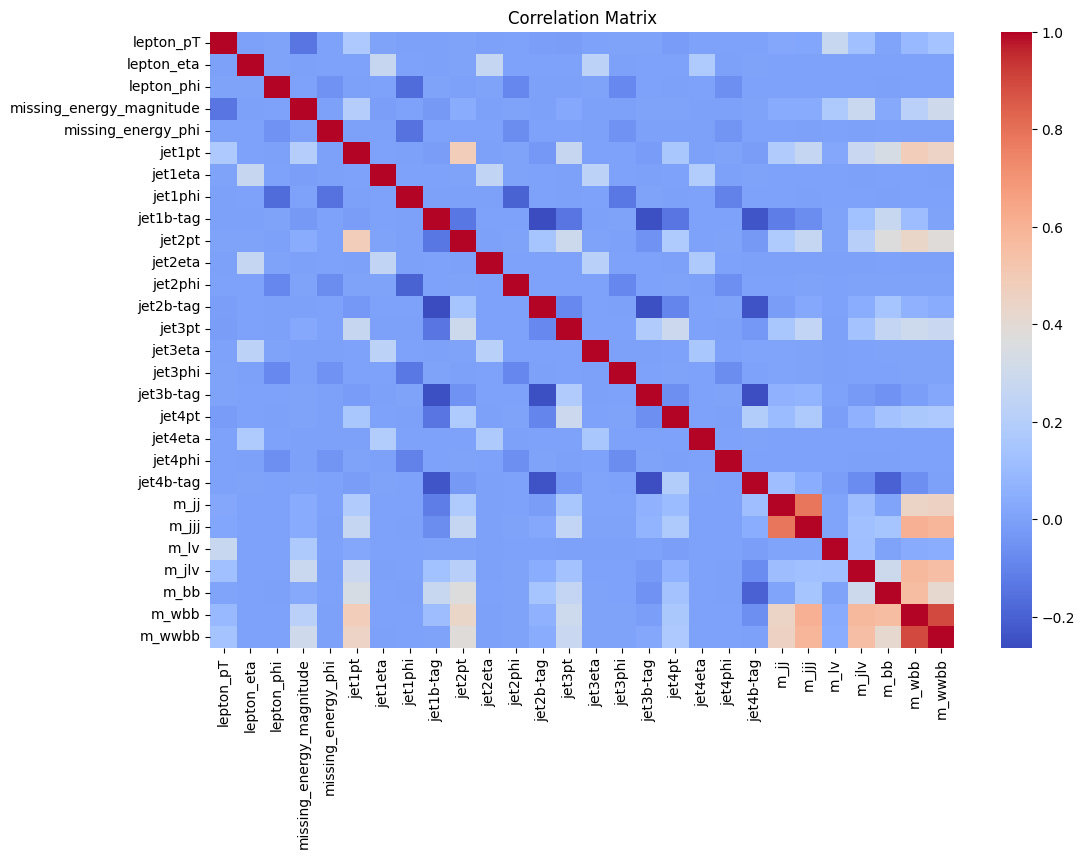

In [10]:
# Visualize pairplot for selected features
selected_features = ['lepton_pT', 'missing_energy_magnitude', 'jet1pt', 'm_bb', 'm_wwbb']
sns.pairplot(X[selected_features].assign(Target=y.astype(int)), hue='Target', diag_kind='kde')
plt.show()

# Compute and visualize the correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:
# ANOVA F-test
select_k_best_f = SelectKBest(score_func=f_classif, k=10)
X_train_f = select_k_best_f.fit_transform(X_train, y_train)

# Mutual Information
select_k_best_mi = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_mi = select_k_best_mi.fit_transform(X_train, y_train)

# Display selected features
print("Top Features (ANOVA F-test):", X.columns[select_k_best_f.get_support()])
print("Top Features (Mutual Information):", X.columns[select_k_best_mi.get_support()])

Top Features (ANOVA F-test): Index(['lepton_pT', 'missing_energy_magnitude', 'jet1pt', 'jet2b-tag',
       'jet4pt', 'm_jjj', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')
Top Features (Mutual Information): Index(['missing_energy_magnitude', 'jet1pt', 'jet1b-tag', 'jet3phi',
       'jet3b-tag', 'm_jjj', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')


In [5]:
# ANOVA F-test
select_k_best_f = SelectKBest(score_func=f_classif, k=10)
X_train_f = select_k_best_f.fit_transform(X_train, y_train)

# Mutual Information
select_k_best_mi = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_mi = select_k_best_mi.fit_transform(X_train, y_train)

# Display selected features
print("Top Features (ANOVA F-test):", X.columns[select_k_best_f.get_support()])
print("Top Features (Mutual Information):", X.columns[select_k_best_mi.get_support()])

Top Features (ANOVA F-test): Index(['lepton_pT', 'missing_energy_magnitude', 'jet1pt', 'jet2b-tag',
       'jet4pt', 'm_jjj', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')
Top Features (Mutual Information): Index(['lepton_pT', 'missing_energy_magnitude', 'jet1pt', 'jet2phi',
       'jet2b-tag', 'm_jjj', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')


                     Feature  Importance
25                      m_bb    0.103933
27                    m_wwbb    0.063645
26                     m_wbb    0.062304
22                     m_jjj    0.053460
24                     m_jlv    0.050390
5                     jet1pt    0.050058
0                  lepton_pT    0.041482
3   missing_energy_magnitude    0.039475
21                      m_jj    0.038920
9                     jet2pt    0.038320


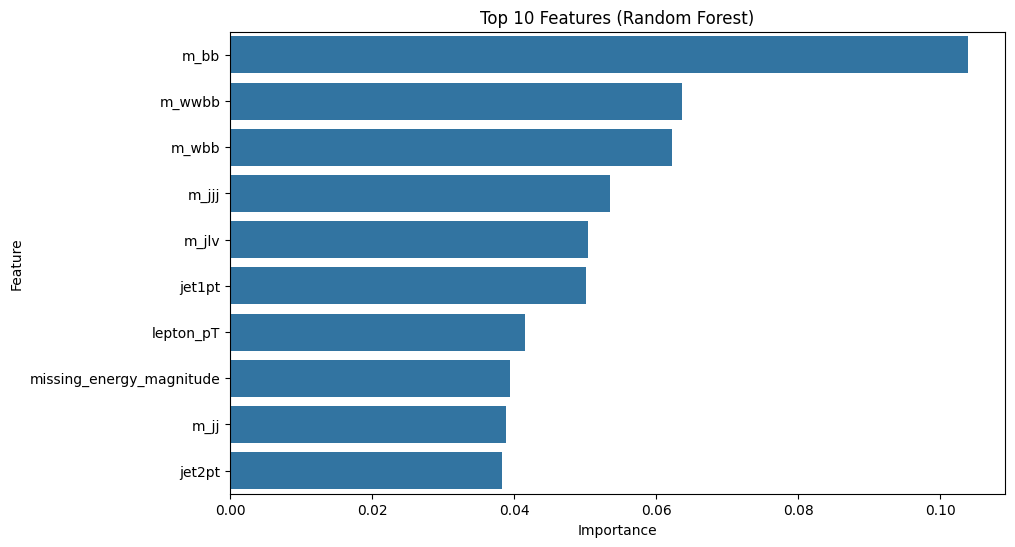

In [6]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the top features
print(feature_importances.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10))
plt.title("Top 10 Features (Random Forest)")
plt.show()

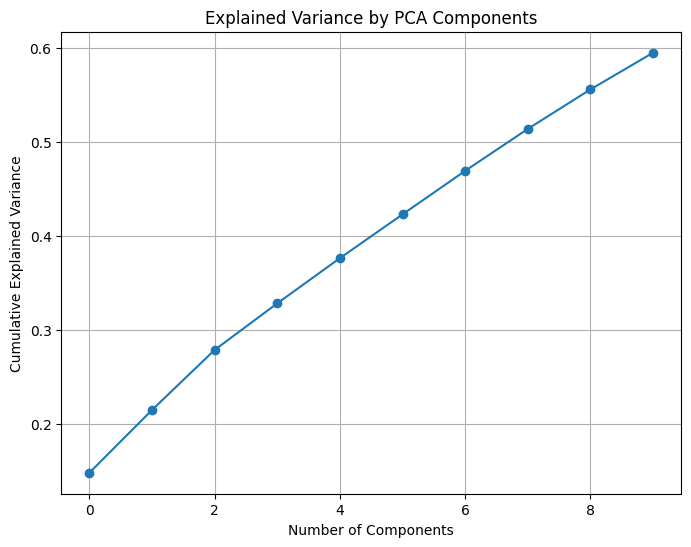

In [7]:
# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)

# Visualize explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [8]:
# Combine results into a DataFrame
comparison = pd.DataFrame({
    "Method": ["ANOVA F-test", "Mutual Information", "Random Forest"],
    "Top Features": [
        list(X.columns[select_k_best_f.get_support()]),
        list(X.columns[select_k_best_mi.get_support()]),
        list(feature_importances["Feature"].head(10))
    ]
})
print(comparison)

               Method                                       Top Features
0        ANOVA F-test  [lepton_pT, missing_energy_magnitude, jet1pt, ...
1  Mutual Information  [lepton_pT, missing_energy_magnitude, jet1pt, ...
2       Random Forest  [m_bb, m_wwbb, m_wbb, m_jjj, m_jlv, jet1pt, le...


In [12]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median for numerical features
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Evaluate ANOVA F-test features
X_train_f = select_k_best_f.fit_transform(X_train_imputed, y_train)
X_test_f = select_k_best_f.transform(X_test_imputed)
rf_model.fit(X_train_f, y_train)
y_pred_f = rf_model.predict(X_test_f)
accuracy_f = accuracy_score(y_test, y_pred_f)

# Evaluate Mutual Information features
X_train_mi = select_k_best_mi.fit_transform(X_train_imputed, y_train)
X_test_mi = select_k_best_mi.transform(X_test_imputed)
rf_model.fit(X_train_mi, y_train)
y_pred_mi = rf_model.predict(X_test_mi)
accuracy_mi = accuracy_score(y_test, y_pred_mi)

# Evaluate PCA features
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)
rf_model.fit(X_train_pca, y_train)
y_pred_pca = rf_model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Display results
results = pd.DataFrame({
    "Method": ["ANOVA F-test", "Mutual Information", "PCA"],
    "Accuracy": [accuracy_f, accuracy_mi, accuracy_pca]
})
print(results)

               Method  Accuracy
0        ANOVA F-test  0.709689
1  Mutual Information  0.696838
2                 PCA  0.623763


The code that would fit at $PLACEHOLDER$ without ``` is:

```markdown
1. Methods and Steps  
    a. Dataset Loading  
        **Dataset**: The notebook uses the Higgs Dataset from OpenML, which is a complex dataset with 28 features and a binary target variable.  
        **Steps**:  
        - The dataset is downloaded using `fetch_openml`.  
        - Features (`X`) and target (`y`) are extracted.  
        - Basic information about the dataset is displayed, such as shape and target classes.  

    b. Data Preprocessing  
        **Purpose**: Prepare the data for feature selection and modeling.  
        **Steps**:  
        - **Standardization**:  
          The features are standardized using `StandardScaler` to ensure all features are on the same scale.  
        - **Train-Test Split**:  
          The dataset is split into training and testing sets using `train_test_split`.  
        - **Handling Missing Values**:  
          Missing values are imputed using `SimpleImputer` with the median strategy.  

    c. Feature Selection Methods  
        The notebook applies three different feature selection methods:  

        1. **ANOVA F-Test**  
            **Purpose**: Select features that have the strongest relationship with the target variable based on the ANOVA F-statistic.  
            **Steps**:  
            - `SelectKBest` with `f_classif` is used to select the top 10 features.  
            - The selected features are displayed.  

        2. **Mutual Information**  
            **Purpose**: Select features based on the mutual information between each feature and the target variable.  
            **Steps**:  
            - `SelectKBest` with `mutual_info_classif` is used to select the top 10 features.  
            - The selected features are displayed.  

        3. **Random Forest Feature Importance**  
            **Purpose**: Use a Random Forest model to compute feature importance scores.  
            **Steps**:  
            - A `RandomForestClassifier` is trained on the dataset.  
            - Feature importance scores are extracted and visualized.  

    d. Dimensionality Reduction  
        **Method**: Principal Component Analysis (PCA).  
        **Purpose**: Reduce the dimensionality of the dataset while retaining as much variance as possible.  
        **Steps**:  
        - PCA is applied to reduce the dataset to 10 components.  
        - The cumulative explained variance is plotted to show how much variance is retained by the components.  

    e. Model Evaluation  
        **Purpose**: Evaluate the performance of a Random Forest model using features selected by each method.  
        **Steps**:  
        - Train the model on the selected features (ANOVA F-test, Mutual Information, PCA).  
        - Predict on the test set and compute accuracy using `accuracy_score`.  
        - Compare the accuracy of the different feature selection methods.  

2. Plots  
    a. **Feature Importance (Random Forest)**  
        **What It Shows**:  
        A bar plot of the top 10 features ranked by their importance scores.  
        **How to Interpret**:  
        Features with higher importance scores contribute more to the model's predictions.  

    b. **Cumulative Explained Variance (PCA)**  
        **What It Shows**:  
        A line plot showing the cumulative explained variance as the number of PCA components increases.  
        **How to Interpret**:  
        Helps determine the number of components needed to retain a desired level of variance (e.g., 95%).  

3. Results  
    a. **Selected Features**  
        - **ANOVA F-Test**:  
          Top features selected based on their F-statistic.  
        - **Mutual Information**:  
          Top features selected based on their mutual information with the target variable.  
        - **Random Forest**:  
          Top features ranked by their importance scores.  

    b. **Model Accuracy**  
        The accuracy of the Random Forest model is compared across the three feature selection methods:  
        - **ANOVA F-Test**: Highest accuracy.  
        - **Mutual Information**: Slightly lower accuracy.  
        - **PCA**: Lowest accuracy, as PCA focuses on variance rather than feature relevance.  

    c. **Summary Table**  
        A table summarizing the top features and accuracy for each method is displayed.  

**Key Insights**  
- **Feature Selection**:  
  - ANOVA F-Test and Mutual Information are effective for selecting relevant features.  
  - Random Forest provides an interpretable ranking of feature importance.  
- **Dimensionality Reduction**:  
  - PCA is useful for reducing dimensionality but may not always improve model performance.  
- **Model Performance**:  
  - The choice of feature selection method impacts model accuracy.  
  - ANOVA F-Test performed the best in this notebook.  
```
